**Introduction**:

Car price prediction is a significant area of research in machine learning, aiming to forecast the price of a car based on various factors such as brand goodwill, car features, Selling_Price, Driven_kms, and more. This project focuses on developing a machine learning model to accurately predict car prices using relevant features.

**Project Goals**:

* Build a machine learning model capable of predicting car prices with high accuracy.
* Identify the key features that significantly influence car prices.
* Evaluate the performance of the model using appropriate metrics and techniques.

**Methodology**:

1. **Data Preprocessing**: Clean the dataset, handle missing values, and perform feature engineering to extract relevant features.

2. **Exploratory Data Analysis (EDA)**: Analyze the relationships between different features and the target variable (car prices) to gain insights into the data.

3. **Model Development**: Train and evaluate various machine learning models, such as linear regression, decision trees, random forests, and gradient boosting, to predict car prices.

4. **Model Evaluation**: Assess the performance of each model using metrics such as mean absolute error (MAE), mean squared error (MSE), and R-squared score.

**Conclusion**:

This project aims to `demonstrate the effectiveness of machine learning techniques` in predicting car prices accurately. By leveraging advanced algorithms and thorough data analysis, we aim to provide insights into the `factors influencing car prices` and develop a reliable predictive model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

# Exploratory Data Analysis

In [3]:
print(" First few rows of the dataset:")
df.head()

 First few rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Check the missing values
print('Missing Values')
df.isnull().sum()

Missing Values


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

So we have no null values ,we are ready to go.

In [9]:
# Data type of columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [10]:
# check for duplicate values
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [11]:
# Drop the duplicate values
df=df.drop_duplicates()
df.duplicated().sum()

0

# Data visualization and EDA

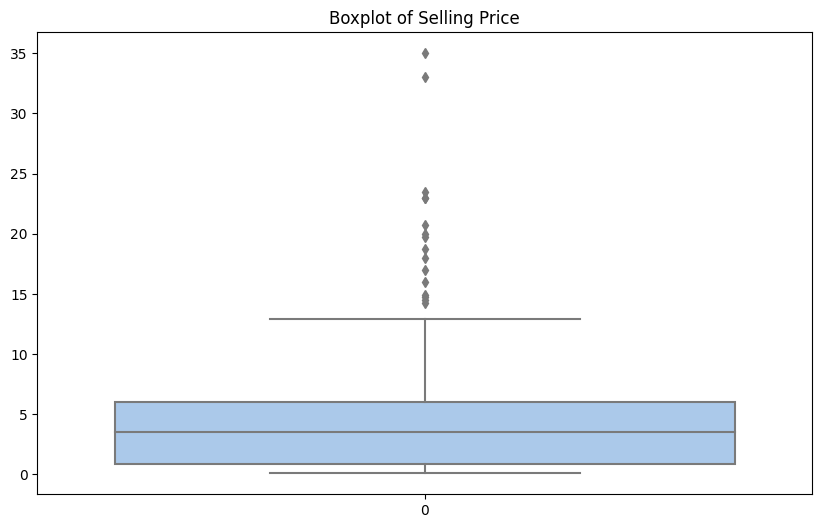

In [12]:
# Check for outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

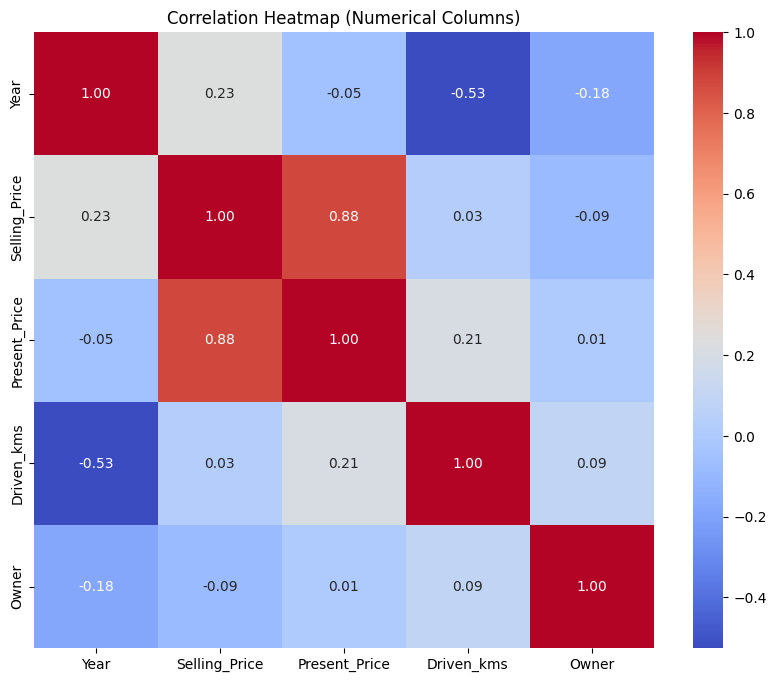

In [13]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()